<a href="https://colab.research.google.com/github/it24102790/Lab1Q1/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importing the preprocessed dataset
data=pd.read_csv('/content/drive/MyDrive/DataSet/Amri_dataset.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data_df=pd.DataFrame(data)

In [ ]:
data_df.columns

Index(['Annual_income', 'Employed_days', 'Family_Members', 'target',
       'GENDER_F', 'GENDER_M', 'Car_Owner_N', 'Car_Owner_Y', 'Propert_Owner_N',
       'Propert_Owner_Y', 'Type_Income_Commercial associate',
       'Type_Income_Pensioner', 'Type_Income_State servant',
       'Type_Income_Working', 'EDUCATION_Academic degree',
       'EDUCATION_Higher education', 'EDUCATION_Incomplete higher',
       'EDUCATION_Lower secondary', 'EDUCATION_Secondary / secondary special',
       'Marital_status_Civil marriage', 'Marital_status_Married',
       'Marital_status_Separated', 'Marital_status_Single / not married',
       'Marital_status_Widow', 'Housing_type_Co-op apartment',
       'Housing_type_House / apartment', 'Housing_type_Municipal apartment',
       'Housing_type_Office apartment', 'Housing_type_Rented apartment',
       'Housing_type_With parents'],
      dtype='object')

In [ ]:
len(data_df.columns)

30

In [ ]:
# splitting the target variable and input data
X,y=data_df.drop('target',axis=1),data_df['target']

In [ ]:
data_df.target.value_counts()

,count
target,
Approved,1356
Rejected,165


In [ ]:
# encoding the target variable
y=np.where(y=='Approved',0,1)

In [ ]:
# splitting into train set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)

## Random Forest

A random forest is basically collection (ensemble) of many Decision Trees working together.Each tree gives its own prediction, and the forest takes a vote(for classification) or average (for regression)

so instead of trusting one tree, Random Forest combines the wisdom of many.

A single decision tree is:
*  Easy to understand
* But very sensitive - small changes in data can change the whole structture

Random Forest fixes that by:
* Combiningn many slightly different trees to make one strong,stable model.

------------


**How Random Forest Works**


1. Boostrap sampling(Random Data)

    For each tree, the algorithm takes a random sample (with replacement) of the training data.

    This means:
    * Each trees a slightly different dataset.
    * Some rows may appear more than once, some not at all
    
    This helps reduce overfitting


2. Random Feature Selection

    When splitting a node (choosing which feature to split on), the tree doesn’t consider all features, only a random subset.

    This ensures trees are diverse - they don't all make the same decision


**Important Parameters**
| Parameter             | Description                              | Effect                                     |
| --------------------- | ---------------------------------------- | ------------------------------------------ |
| **n_estimators**      | Number of trees in the forest            | More trees → better performance but slower |
| **max_depth**         | Maximum depth of each tree               | Prevents overfitting                       |
| **max_features**      | Number of features considered per split  | Controls randomness and diversity          |
| **min_samples_split** | Minimum samples to split a node          | Prevents overly complex trees              |
| **random_state**      | Random seed (for reproducibility)        | Same result every time                     |
| **criterion**         | ‘gini’ or ‘entropy’ (for classification) | Defines how splits are chosen              |


In [ ]:
# importing random forest from sklearn
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# importing grid search
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid=[
    {
        'n_estimators':[80,100],
        'max_depth':[3,4,5],
        'max_features':[5,8],
        'random_state':[42],
        'criterion':['gini']
    }
]

In [ ]:
grid_search=GridSearchCV(RandomForestClassifier(),param_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini'], 'max_depth': [3, 4, 5],
                          'max_features': [5, 8], 'n_estimators': [80, 100],
                          'random_state': [42]}])

In [ ]:
print(f"Best cross validation score: {grid_search.best_score_}")

Best cross validation score: 0.8939182351750657


In [ ]:
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 8, 'n_estimators': 80, 'random_state': 42}


In [ ]:
results=pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.137609,0.024121,0.008346,0.000872,gini,3,5,80,42,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.889344,0.893004,0.893004,0.893004,0.888889,0.891449,0.001910,4
1,0.159246,0.003719,0.010445,0.002749,gini,3,5,100,42,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.889344,0.893004,0.893004,0.893004,0.888889,0.891449,0.001910,4
2,0.138827,0.015366,0.009539,0.002605,gini,3,8,80,42,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.889344,0.893004,0.893004,0.893004,0.888889,0.891449,0.001910,4
3,0.170816,0.007279,0.009425,0.000339,gini,3,8,100,42,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.889344,0.893004,0.893004,0.893004,0.888889,0.891449,0.001910,4
4,0.130622,0.001690,0.007856,0.000094,gini,4,5,80,42,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.889344,0.893004,0.893004,0.893004,0.888889,0.891449,0.001910,4
5,0.164611,0.008237,0.009517,0.000498,gini,4,5,100,42,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.889344,0.893004,0.893004,0.893004,0.888889,0.891449,0.001910,4
6,0.145570,0.007781,0.008092,0.000173,gini,4,8,80,42,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.889344,0.893004,0.893004,0.893004,0.888889,0.891449,0.001910,4
7,0.189966,0.017892,0.015574,0.012430,gini,4,8,100,42,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.889344,0.893004,0.893004,0.893004,0.888889,0.891449,0.001910,4
8,0.244653,0.193606,0.017978,0.010629,gini,5,5,80,42,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.889344,0.893004,0.893004,0.893004,0.888889,0.891449,0.001910,4
9,0.246754,0.105413,0.011582,0.002700,gini,5,5,100,42,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.889344,0.893004,0.897119,0.893004,0.888889,0.892272,0.002986,3


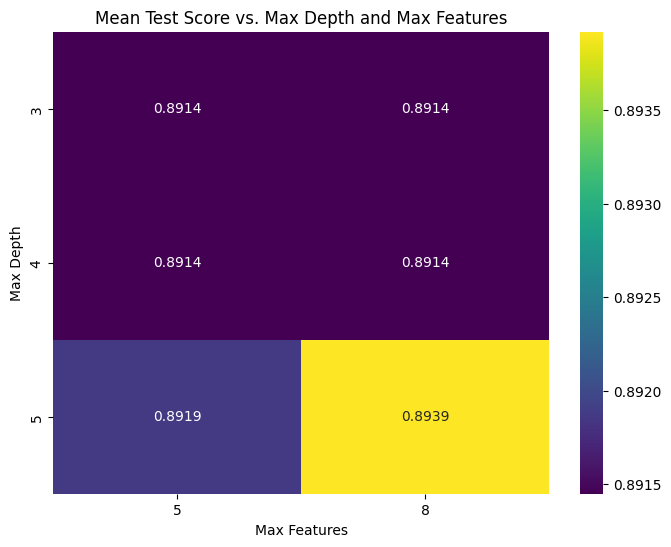

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


results_df = results[['param_max_depth', 'param_max_features', 'mean_test_score']]
grouped_results = results_df.groupby(['param_max_depth', 'param_max_features']).mean().reset_index()
pivot_results = grouped_results.pivot(index='param_max_depth', columns='param_max_features', values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_results, annot=True, cmap='viridis', fmt=".4f")
plt.title('Mean Test Score vs. Max Depth and Max Features')
plt.xlabel('Max Features')
plt.ylabel('Max Depth')
plt.show()

In [ ]:
# making the final model using best parameters
model=RandomForestClassifier(n_estimators=80,max_depth=5,max_features=8,criterion='gini',random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_features=8, n_estimators=80,
                       random_state=42)

In [ ]:
print(f"Test set score: {model.score(X_test,y_test)}")

Test set score: 0.8918032786885246


In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred=model.predict(X_test)
print(f"Classification report: \n{classification_report(y_test,y_pred)}")

Classification report: 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       272
           1       0.00      0.00      0.00        33

    accuracy                           0.89       305
   macro avg       0.45      0.50      0.47       305
weighted avg       0.80      0.89      0.84       305

